# 평균이동법, 지수평활법, 분해시계열

## #01. 작업준비

### 1) 패키지 가져오기

평균이동법, 지수평활법을 위한 별도의 패키지는 필요하지 않다.

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

from helper.util import *
from helper.plot import *
from helper.timeserise import *

import seaborn as sb
from matplotlib import pyplot as plt

# 시계열 분해 패키지
from statsmodels.tsa.seasonal import seasonal_decompose

from pandas import DataFrame

### 2) 데이터 가져오기

월간 항공 승객 수

In [3]:
origin = my_read_excel("https://data.hossam.kr/tsdata/air_passengers.xlsx", index_col="Month", info=False)

## #02. 데이터 전처리 - 차분

정상성을 확보할 때 까지 차분을 수행한다.

=========== 원본 데이터 ===========


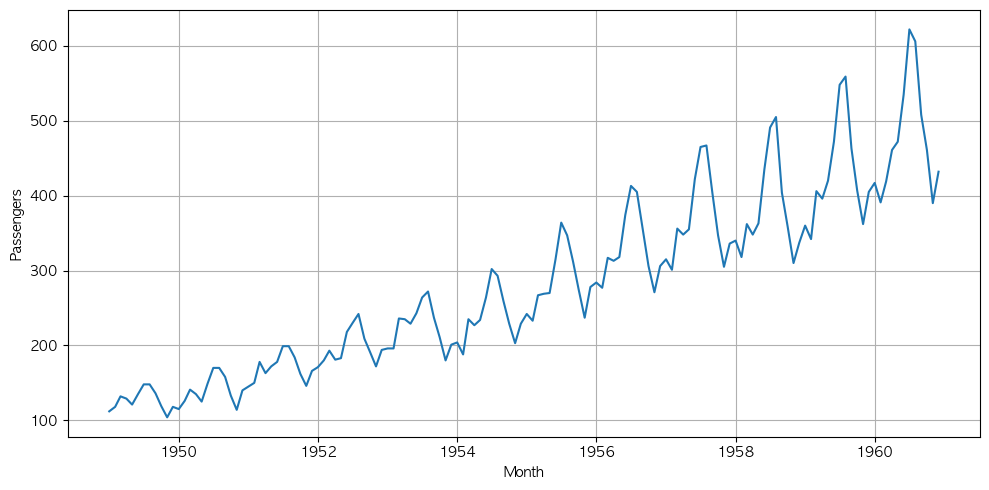

+----------------------------------+---------------------+
|                                  | ADF Test            |
|----------------------------------+---------------------|
| 검정통계량(ADF Statistic)        | 0.8153688792060447  |
| 유의수준(p-value)                | 0.9918802434376409  |
| 최적차수(num of lags)            | 13                  |
| 관측치 개수(num of observations) | 130                 |
| 기각값(Critical Values) 1%       | -3.4816817173418295 |
| 기각값(Critical Values) 5%       | -2.8840418343195267 |
| 기각값(Critical Values) 10%      | -2.578770059171598  |
| 데이터 정상성 여부               | 비정상              |
+----------------------------------+---------------------+
=========== 1차 차분 데이터 ===========


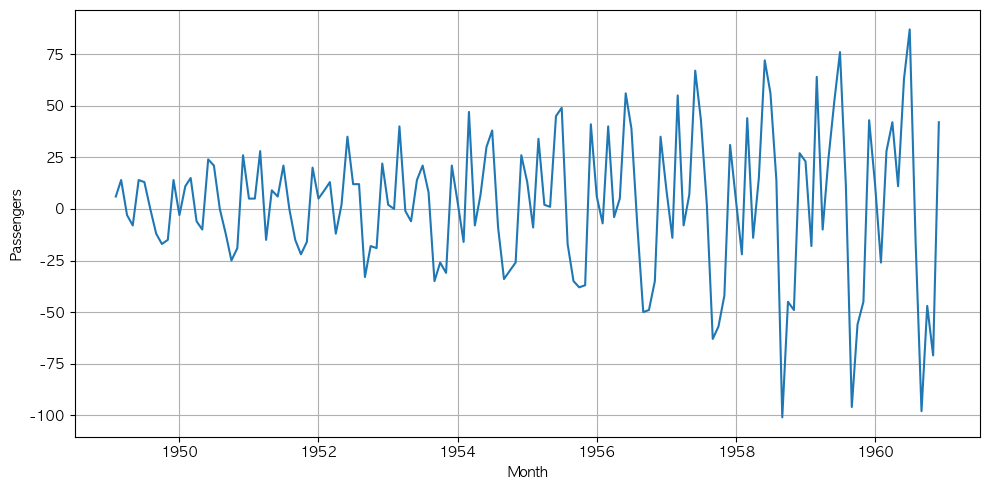

+----------------------------------+----------------------+
|                                  | ADF Test             |
|----------------------------------+----------------------|
| 검정통계량(ADF Statistic)        | -2.8292668241699794  |
| 유의수준(p-value)                | 0.054213290283828236 |
| 최적차수(num of lags)            | 12                   |
| 관측치 개수(num of observations) | 130                  |
| 기각값(Critical Values) 1%       | -3.4816817173418295  |
| 기각값(Critical Values) 5%       | -2.8840418343195267  |
| 기각값(Critical Values) 10%      | -2.578770059171598   |
| 데이터 정상성 여부               | 비정상               |
+----------------------------------+----------------------+
=========== 2차 차분 데이터 ===========


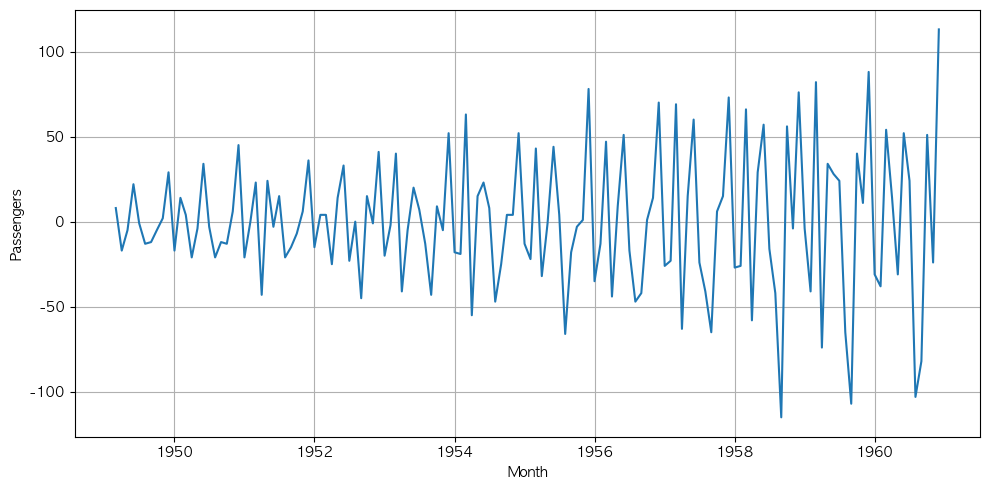

+----------------------------------+-----------------------+
|                                  | ADF Test              |
|----------------------------------+-----------------------|
| 검정통계량(ADF Statistic)        | -16.38423154246855    |
| 유의수준(p-value)                | 2.732891850013928e-29 |
| 최적차수(num of lags)            | 11                    |
| 관측치 개수(num of observations) | 130                   |
| 기각값(Critical Values) 1%       | -3.4816817173418295   |
| 기각값(Critical Values) 5%       | -2.8840418343195267   |
| 기각값(Critical Values) 10%      | -2.578770059171598    |
| 데이터 정상성 여부               | 정상                  |
+----------------------------------+-----------------------+
+---------------------+--------------+
| Month               |   Passengers |
|---------------------+--------------|
| 1949-03-01 00:00:00 |            8 |
| 1949-04-01 00:00:00 |          -17 |
| 1949-05-01 00:00:00 |           -5 |
| 1949-06-01 00:00:00 |           22 |
| 1949-07-01 00:00:00 |         

In [5]:
diff_df = my_diff(origin, 'Passengers')
my_pretty_table(diff_df.head())

## #03. 평균이동법

가장 고전적인 시계열 데이터 분석 방법

주어진 구간의 평균을 구해서 이어서 표시하는 것으로 미래의 데이터를 예측한다.

구간은 분석가가 임의로 정할 수 있다.

평균 이동 결과가 실제 데이터와 얼마나 차이가 나는지의 여부로 데이터를 판단

과거로부터 현재까지의 시계열 자료를 대상으로 일정기간별 평균이동을 계산하면 이들의 추세를 통해 다음 기간을 예측할 수 있다.

> 2~3개 단위로 묶어서 평균을 구해 그 추이를 시각화 해서 판별하는 주관적 방법

데이터의 증감 경향을 확인하기 위해 차분되지 않은 원본 데이터로 하는 경우도 있다.

### [1] 차분되지 않은 원본에 대한 3개월, 6개월, 9개월 평균

#### 평균이동 수행

In [6]:
df1 = origin.copy()

df1['month3'] = df1['Passengers'].rolling(3).mean()
df1['month6'] = df1['Passengers'].rolling(6).mean()
df1['month9'] = df1['Passengers'].rolling(9).mean()
my_pretty_table(df1.head(15))

+---------------------+--------------+----------+----------+----------+
| Month               |   Passengers |   month3 |   month6 |   month9 |
|---------------------+--------------+----------+----------+----------|
| 1949-01-01 00:00:00 |          112 |      nan |      nan |      nan |
| 1949-02-01 00:00:00 |          118 |      nan |      nan |      nan |
| 1949-03-01 00:00:00 |          132 |  120.667 |      nan |      nan |
| 1949-04-01 00:00:00 |          129 |  126.333 |      nan |      nan |
| 1949-05-01 00:00:00 |          121 |  127.333 |      nan |      nan |
| 1949-06-01 00:00:00 |          135 |  128.333 |    124.5 |      nan |
| 1949-07-01 00:00:00 |          148 |  134.667 |    130.5 |      nan |
| 1949-08-01 00:00:00 |          148 |  143.667 |    135.5 |      nan |
| 1949-09-01 00:00:00 |          136 |      144 |  136.167 |      131 |
| 1949-10-01 00:00:00 |          119 |  134.333 |    134.5 |  131.778 |
| 1949-11-01 00:00:00 |          104 |  119.667 |  131.667 |  13

#### 시계열 그래프 확인

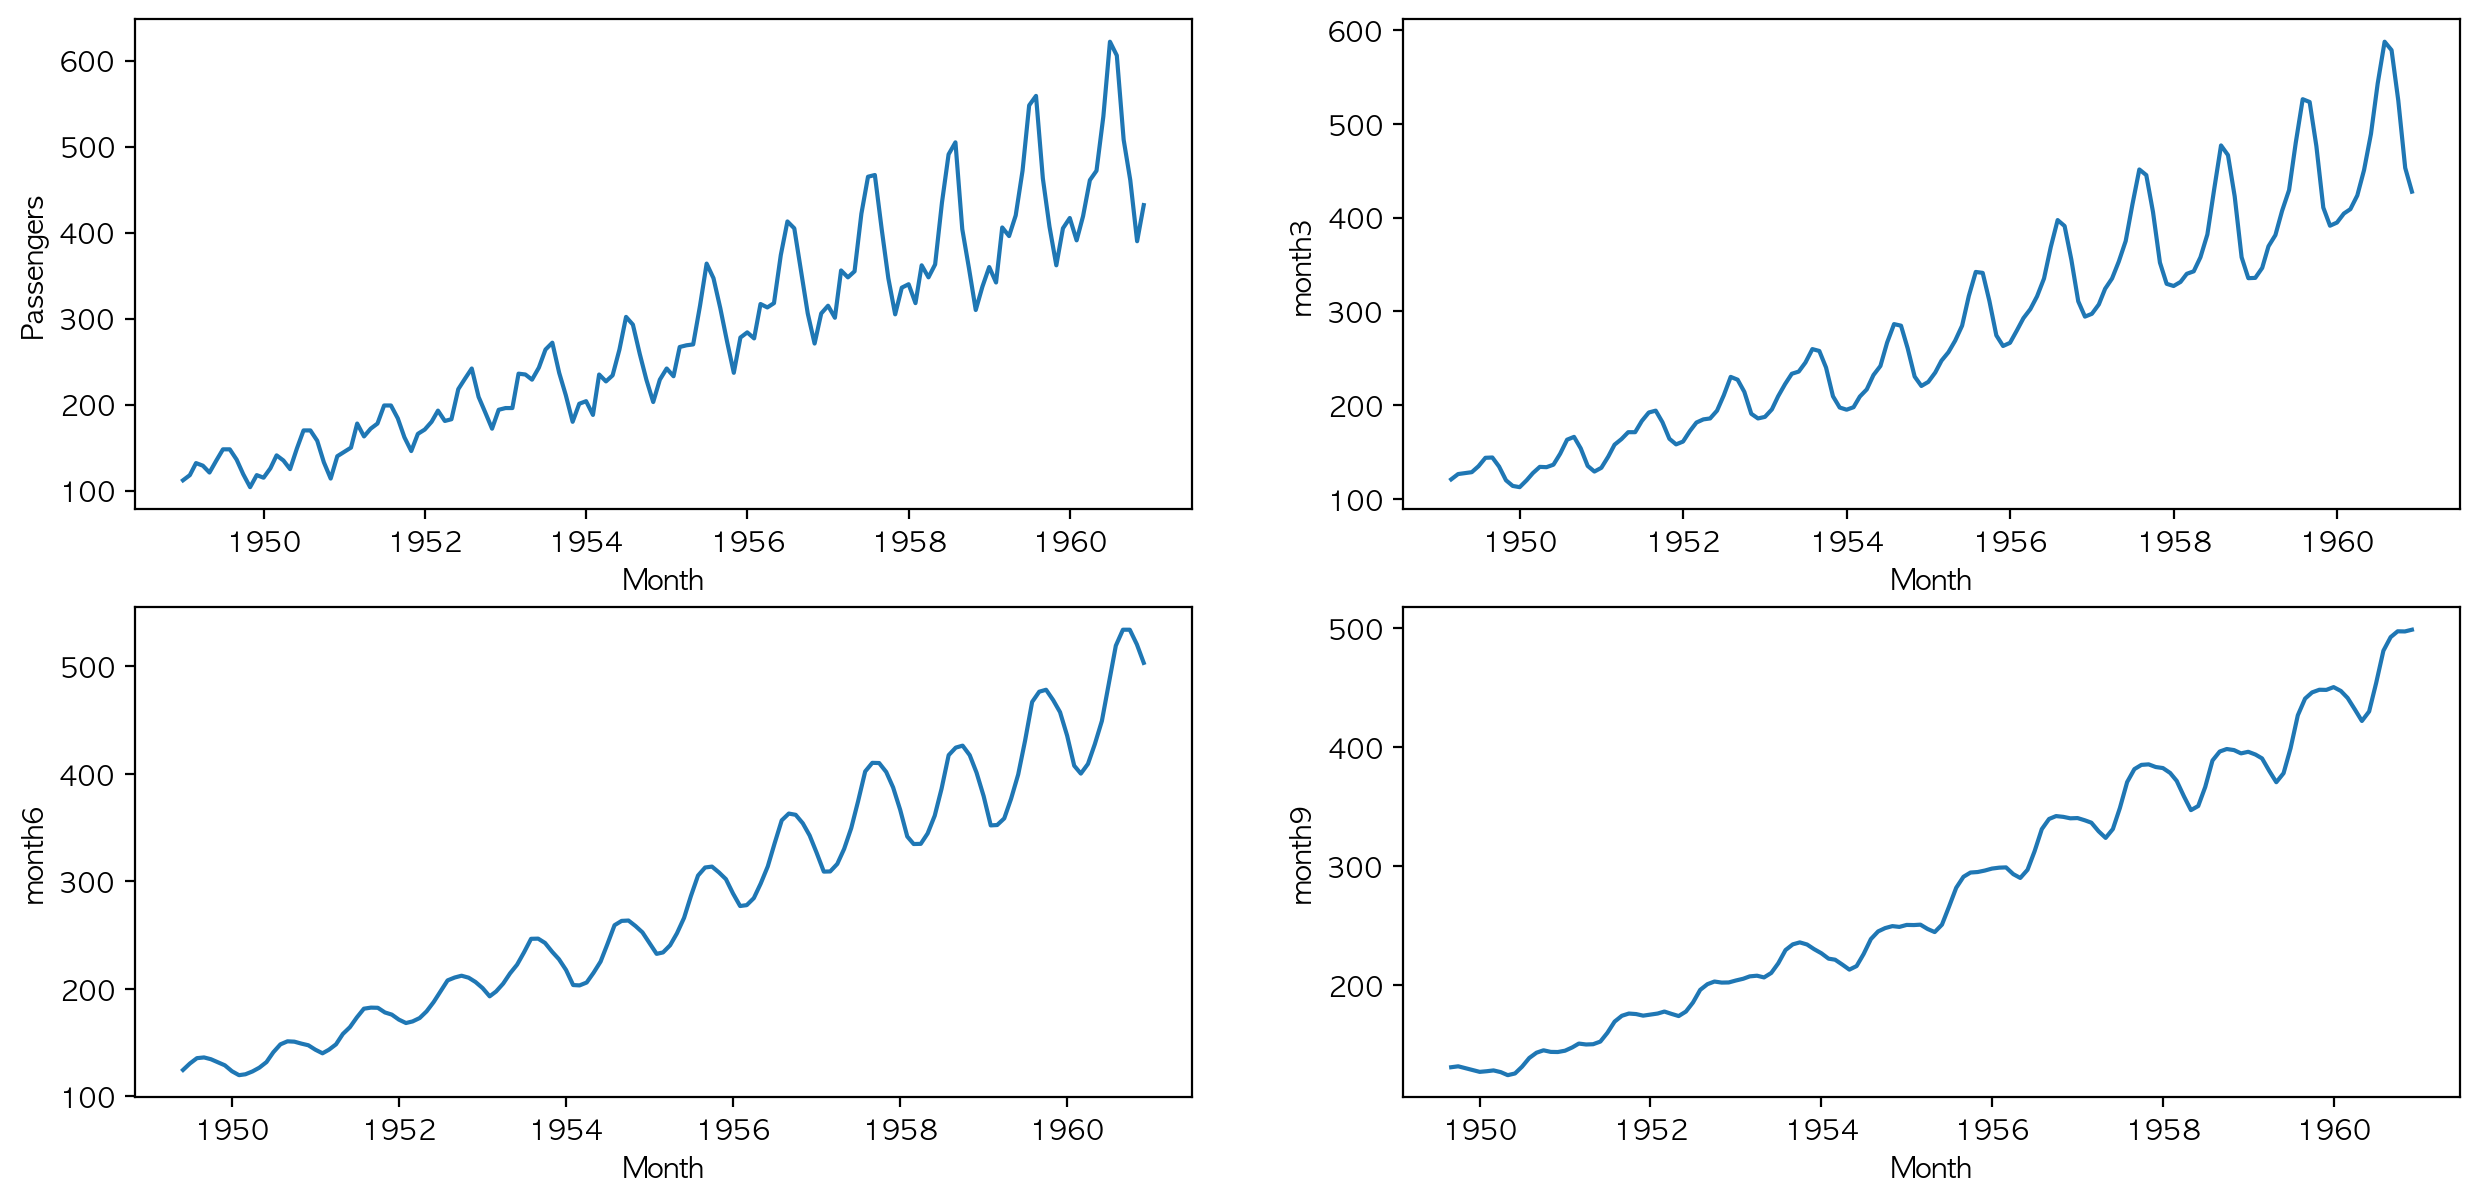

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 7))

sb.lineplot(df1, x=df1.index, y='Passengers', ax=ax1)
sb.lineplot(df1, x=df1.index, y='month3', ax=ax2)
sb.lineplot(df1, x=df1.index, y='month6', ax=ax3)
sb.lineplot(df1, x=df1.index, y='month9', ax=ax4)

plt.show()
plt.close()

> 데이터의 평균을 이동하여 점점 더 그래프가 단순해 진다. 이를 통해 월별 승객 수가 꾸준히 증가하는 추세라는 것을 알 수 있다.
>
> 원본 데이터로 확인할 경우 전반적인 경향을 알 수 있다.

### [2] 차분된 데이터 대한 3개월, 6개월, 9개월 평균

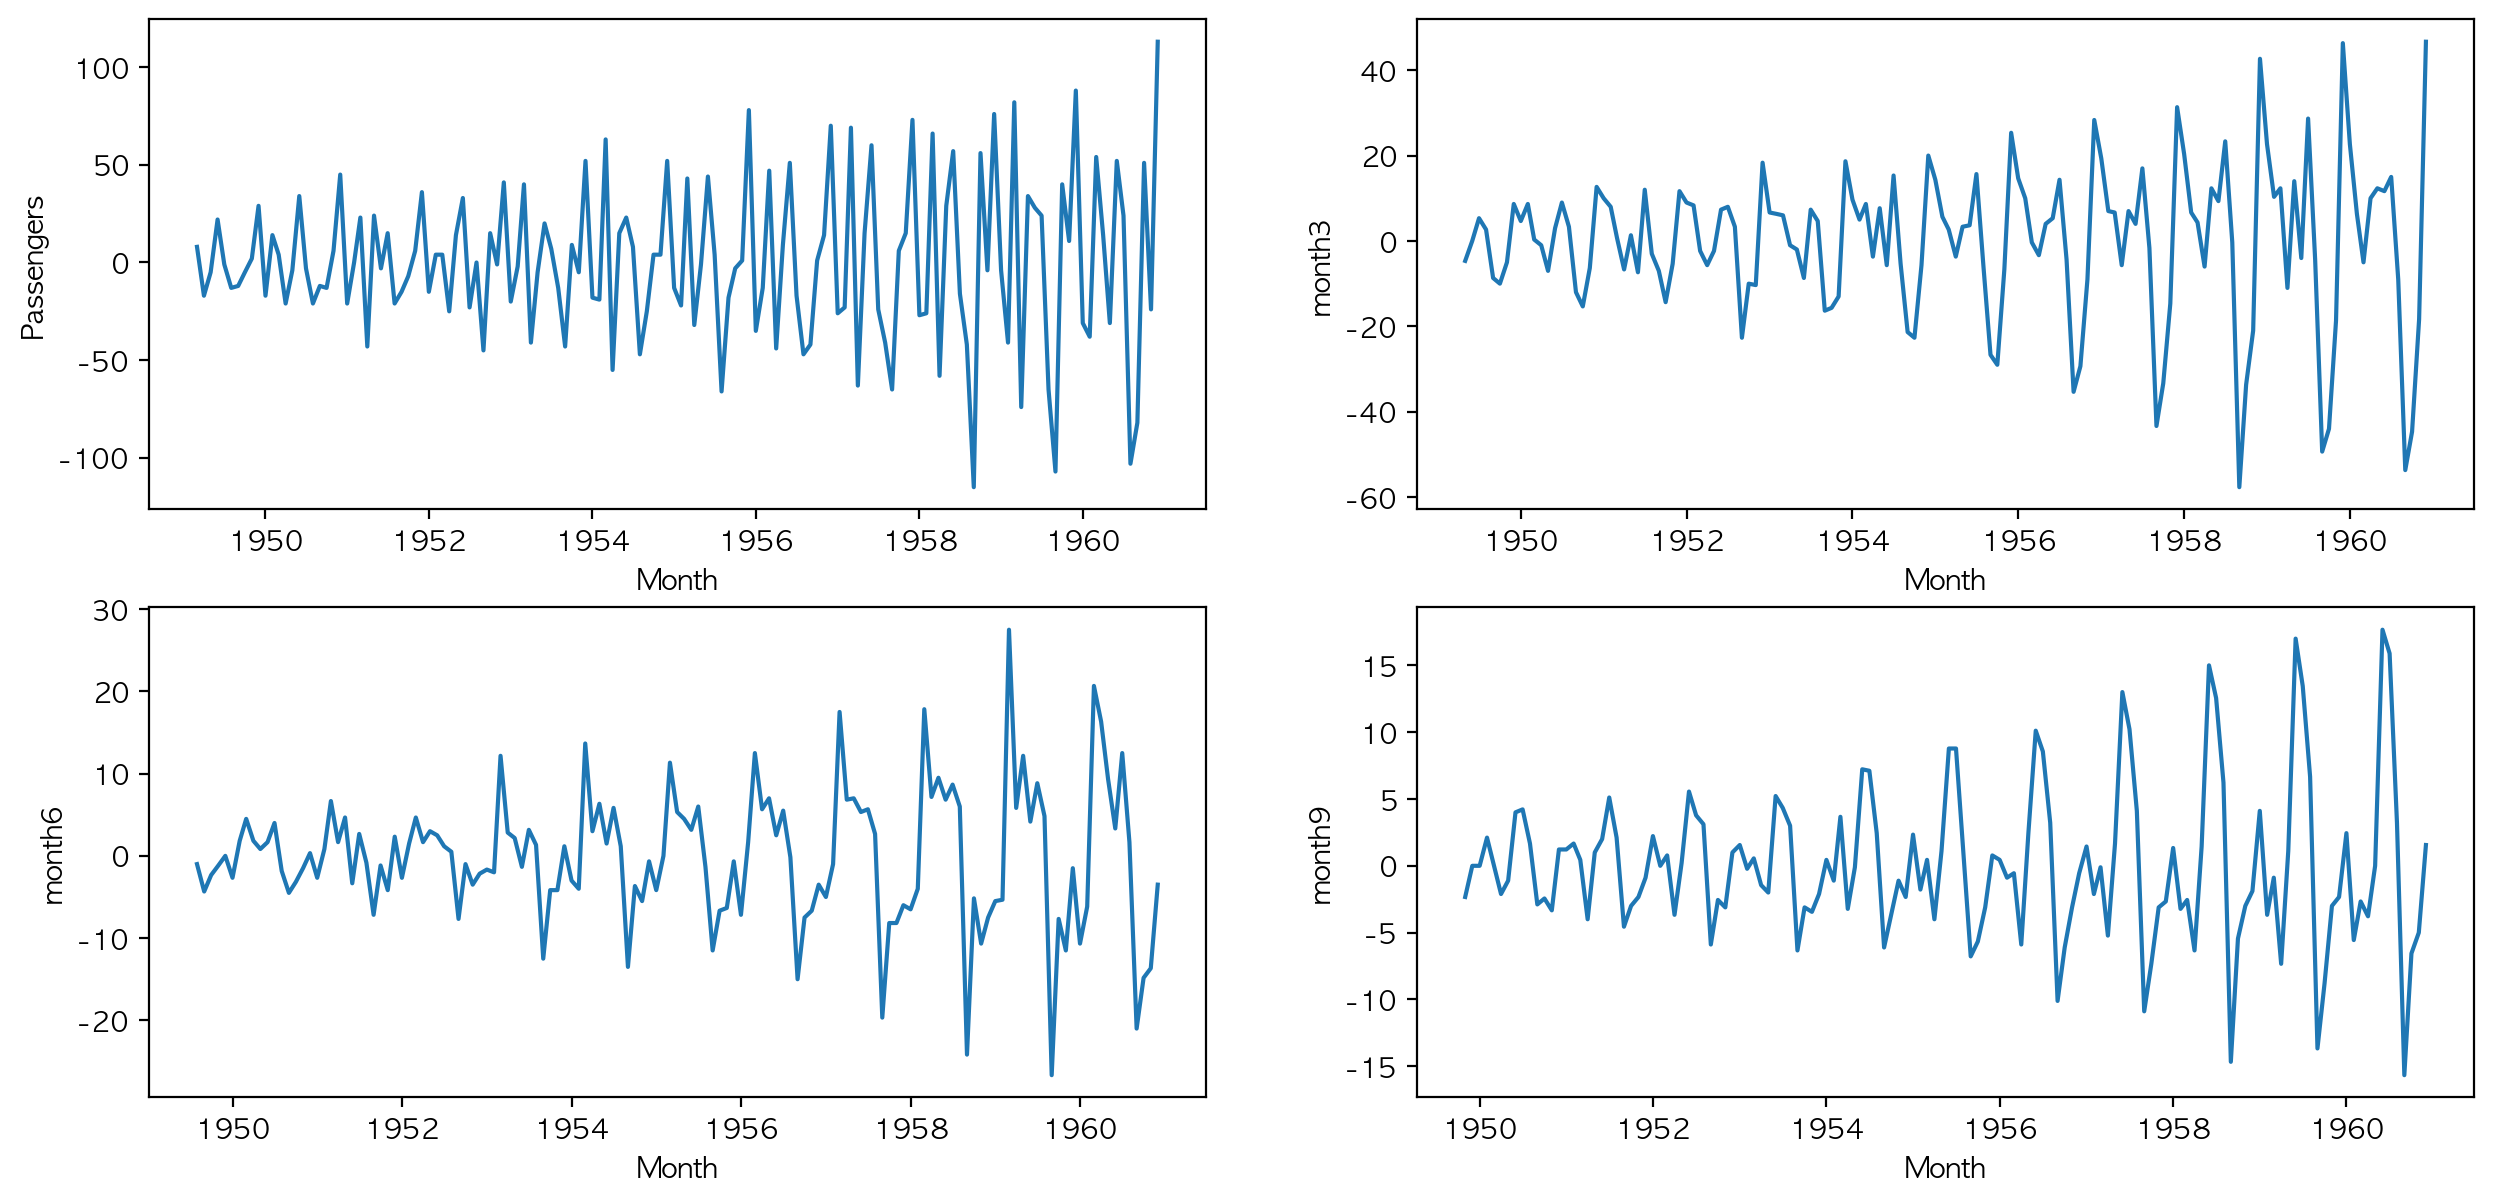

In [8]:
diff_df['month3'] = diff_df['Passengers'].rolling(3).mean()
diff_df['month6'] = diff_df['Passengers'].rolling(6).mean()
diff_df['month9'] = diff_df['Passengers'].rolling(9).mean()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 7))

sb.lineplot(diff_df, x=diff_df.index, y='Passengers', ax=ax1)
sb.lineplot(diff_df, x=diff_df.index, y='month3', ax=ax2)
sb.lineplot(diff_df, x=diff_df.index, y='month6', ax=ax3)
sb.lineplot(diff_df, x=diff_df.index, y='month9', ax=ax4)

plt.show()
plt.close()

> 평균이동을 할 수록 그래프가 단순해 져서 6개월 주기로 증감을 반복하는 트렌드가 있음을 알 수 있다.

## #04. 지수평활법

보다 최근의 값에 가중치를 두면서 이동평균을 계산하는 방법

### (1) 원본에 대한 지수평활법

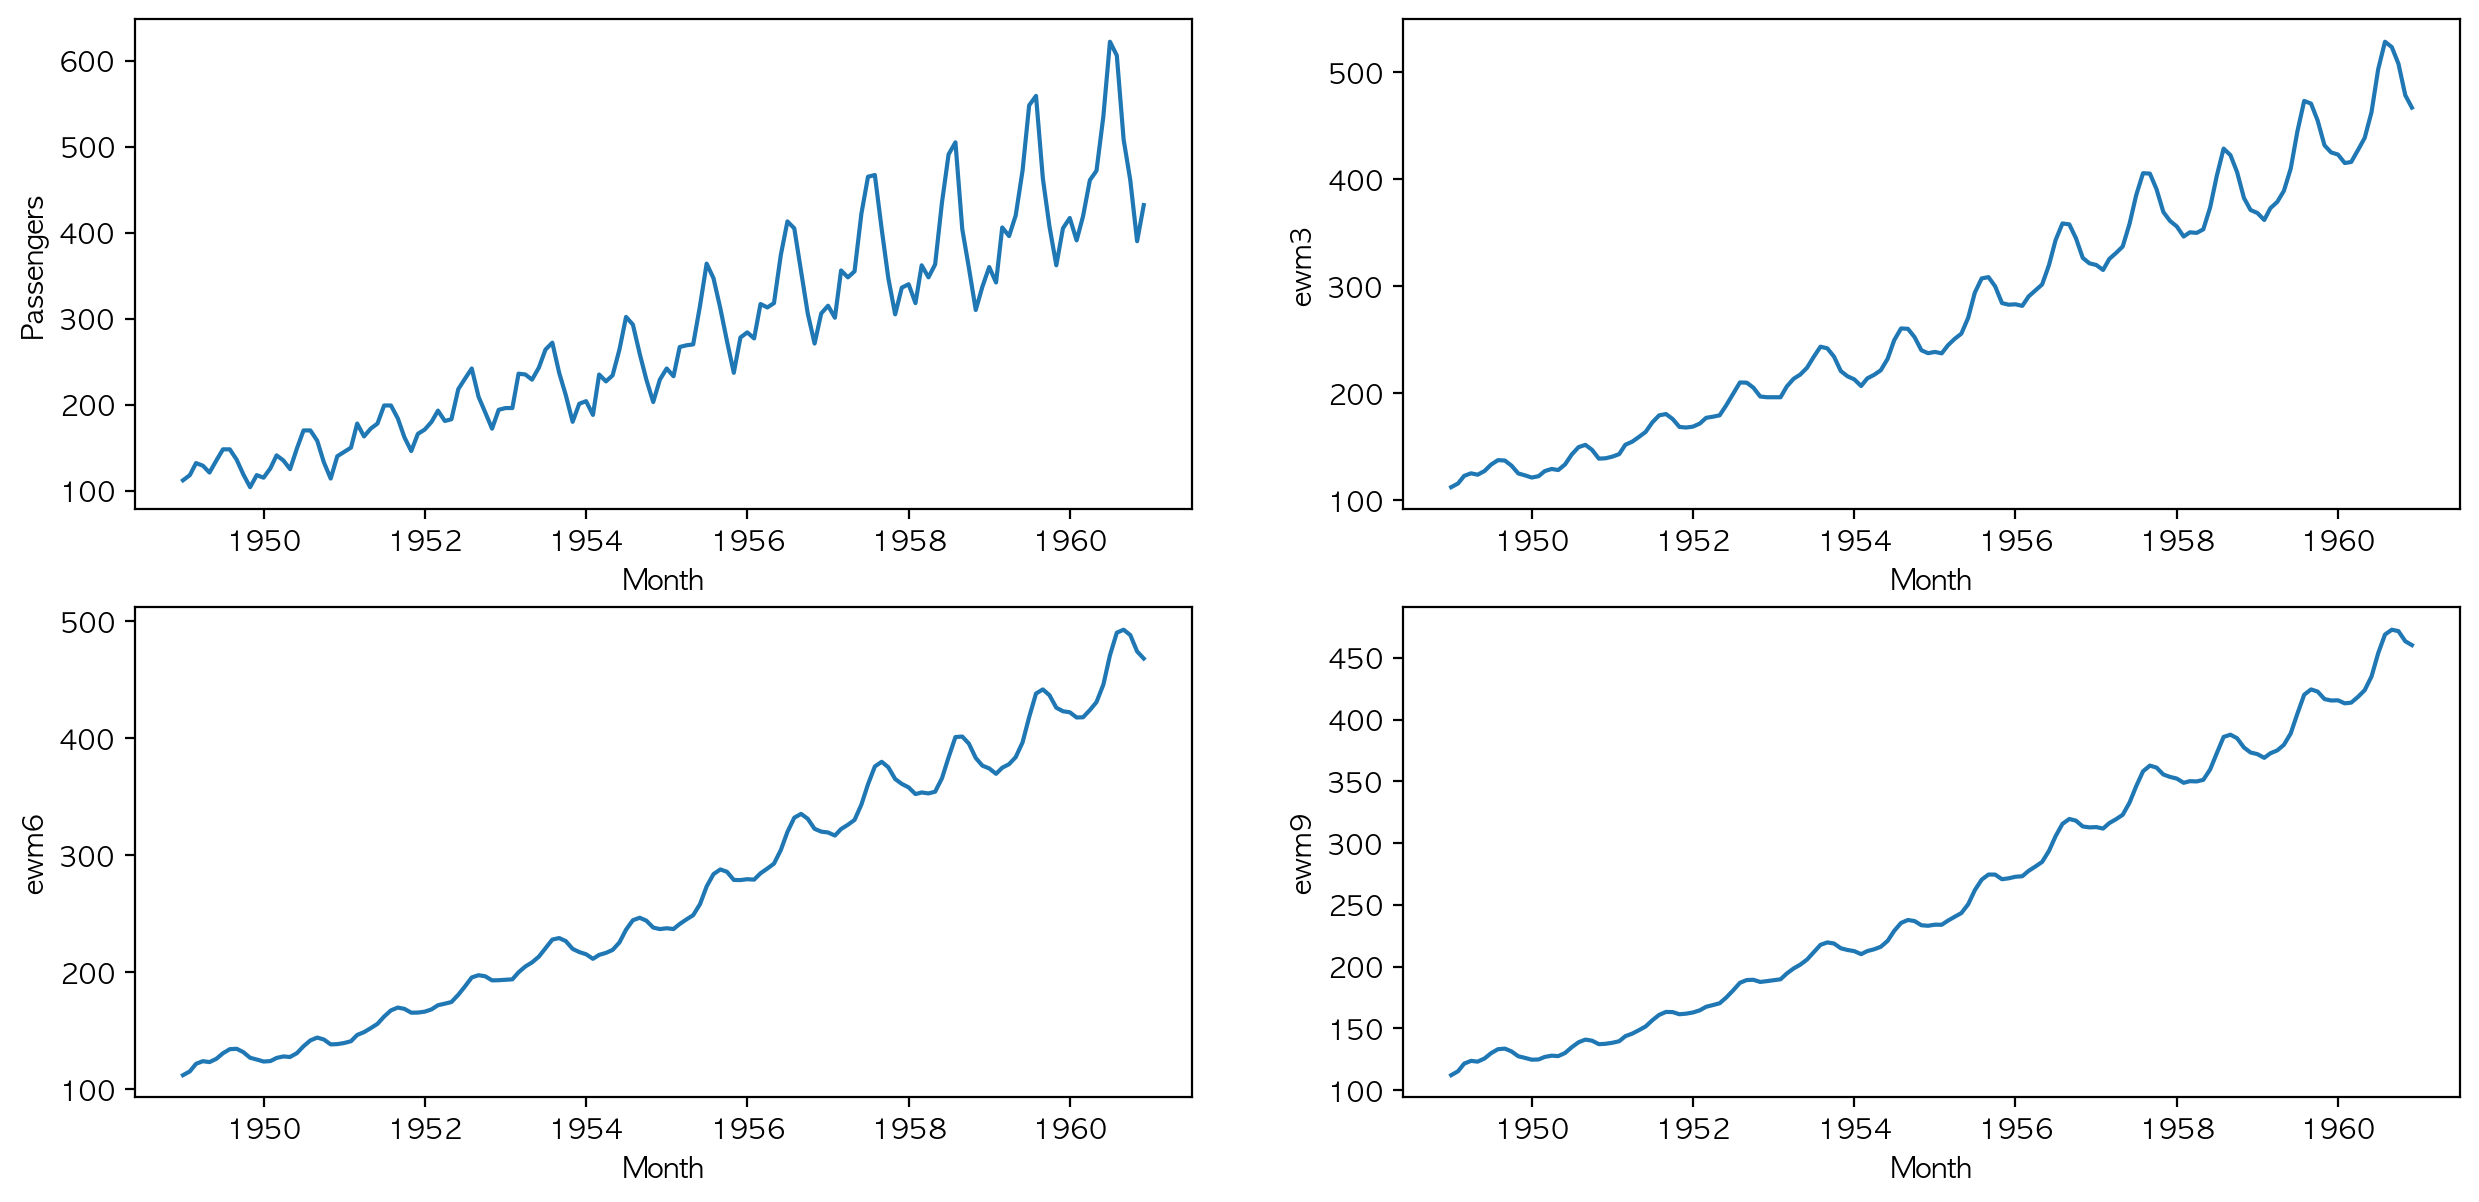

In [9]:
df2 = origin.copy()

df2['ewm3'] = df2['Passengers'].ewm(3).mean()
df2['ewm6'] = df2['Passengers'].ewm(6).mean()
df2['ewm9'] = df2['Passengers'].ewm(9).mean()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 7))

sb.lineplot(df2, x=df2.index, y='Passengers', ax=ax1)
sb.lineplot(df2, x=df2.index, y='ewm3', ax=ax2)
sb.lineplot(df2, x=df2.index, y='ewm6', ax=ax3)
sb.lineplot(df2, x=df2.index, y='ewm9', ax=ax4)

plt.show()
plt.close()

### (2) 차분 결과에 대한 지수평활법

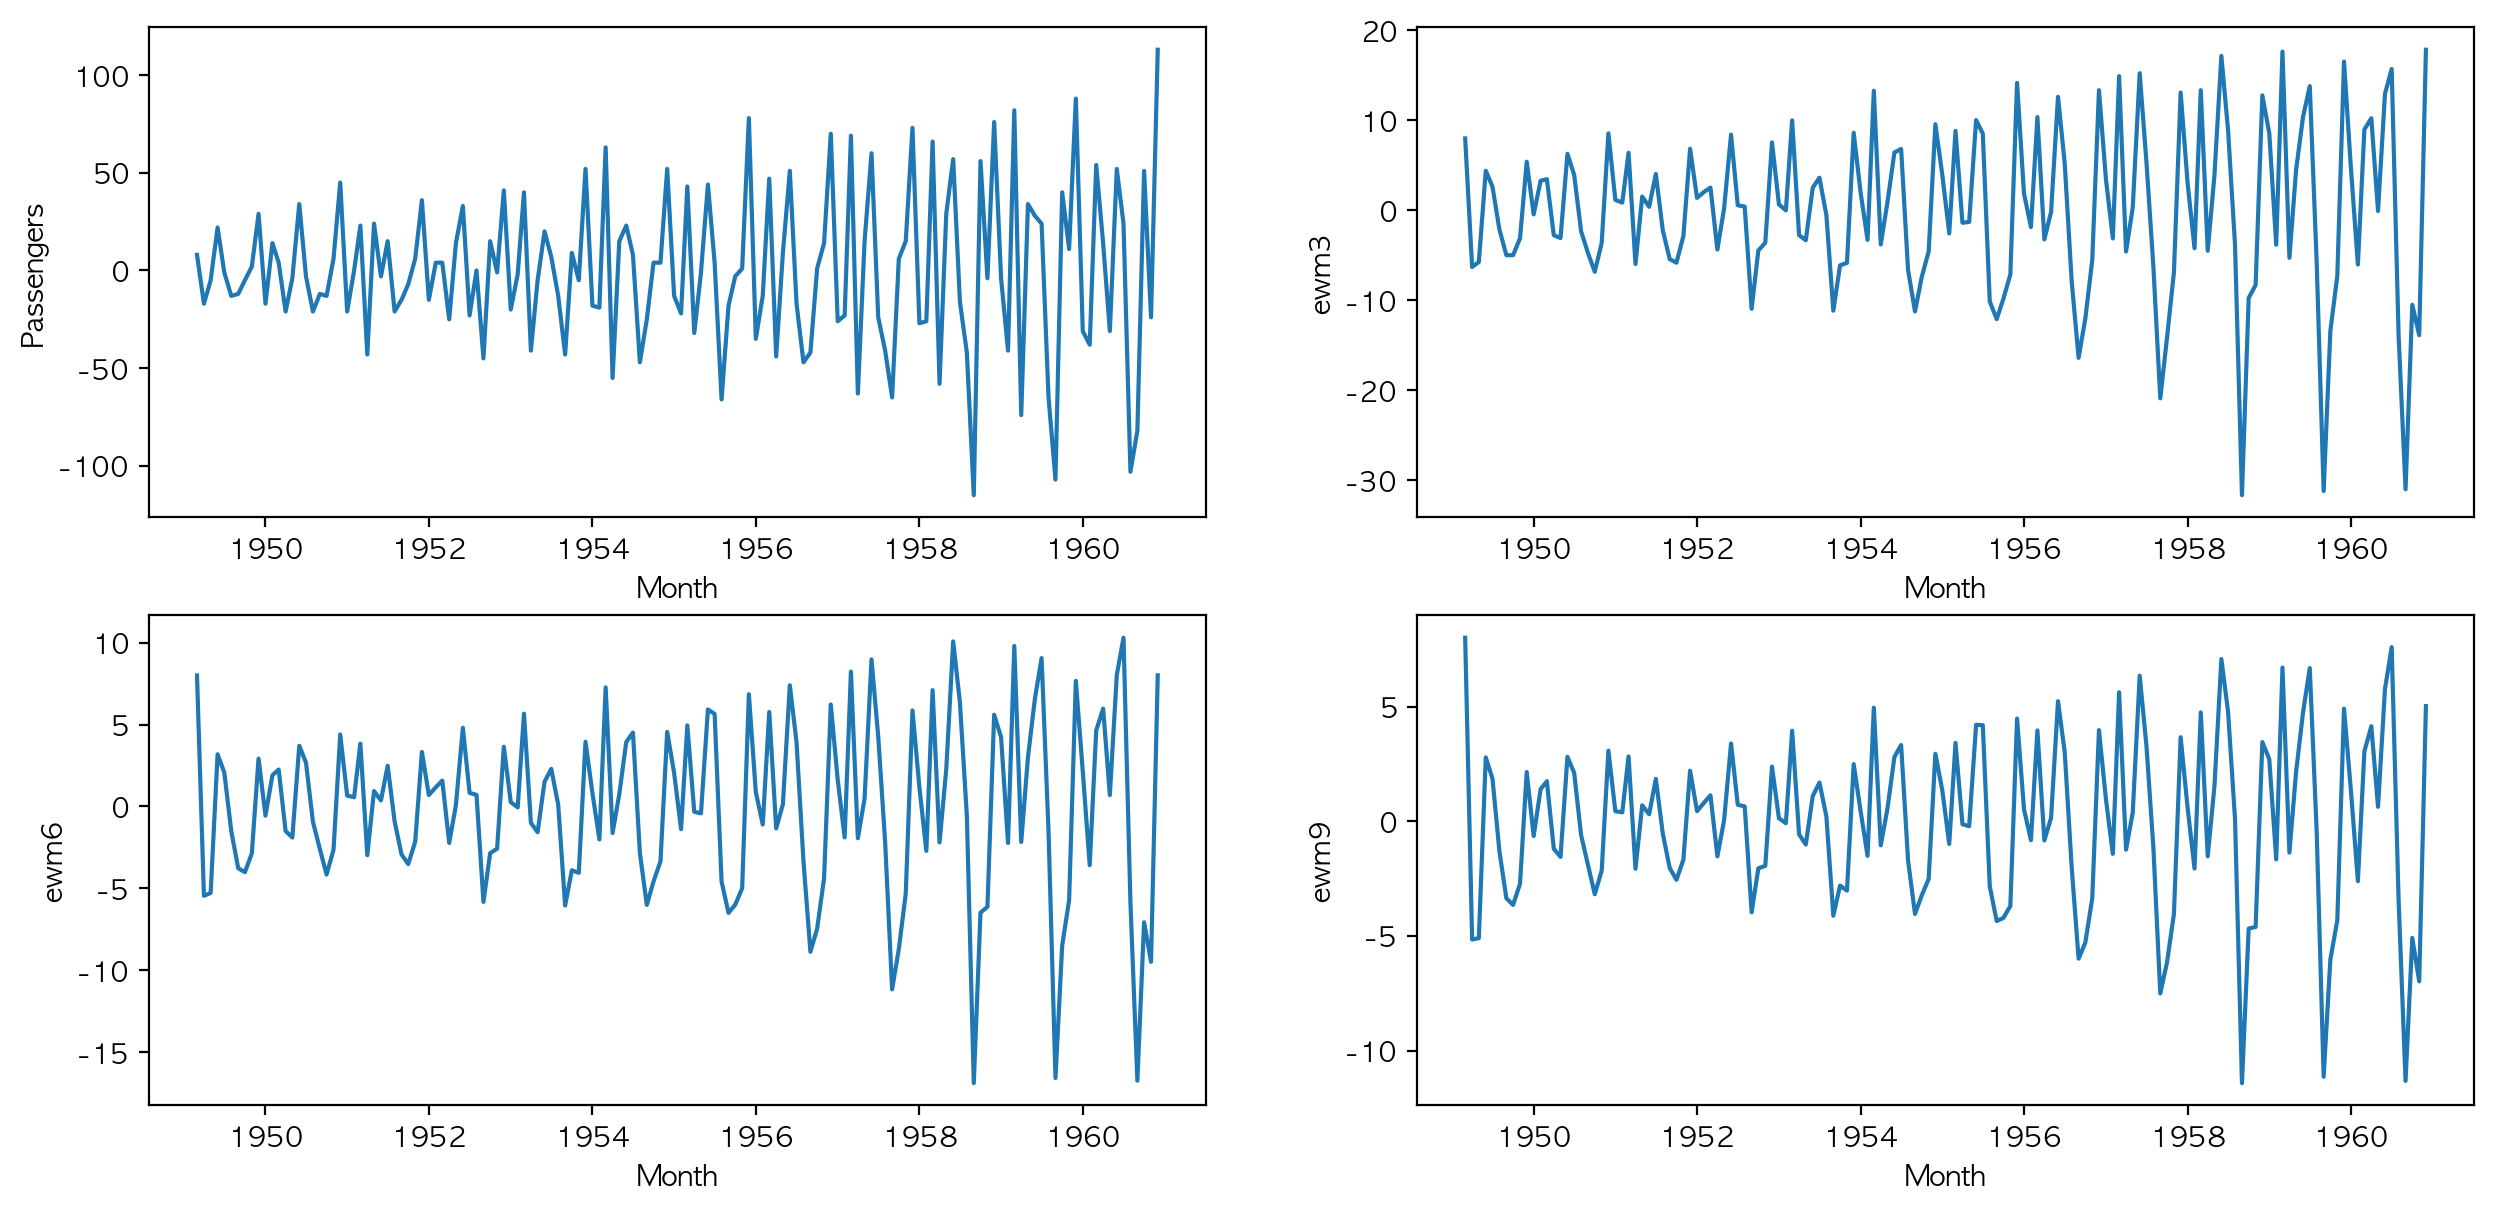

In [10]:
diff_df['ewm3'] = diff_df['Passengers'].ewm(3).mean()
diff_df['ewm6'] = diff_df['Passengers'].ewm(6).mean()
diff_df['ewm9'] = diff_df['Passengers'].ewm(9).mean()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 7))

sb.lineplot(diff_df, x=diff_df.index, y='Passengers', ax=ax1)
sb.lineplot(diff_df, x=diff_df.index, y='ewm3', ax=ax2)
sb.lineplot(diff_df, x=diff_df.index, y='ewm6', ax=ax3)
sb.lineplot(diff_df, x=diff_df.index, y='ewm9', ax=ax4)

plt.show()
plt.close()

> 평균이동법과 지수평활법은 시각화 결과물을 분석가의 주관대로 해석하는 방법이므로 추론통계보다는 탐색적 데이터 분석 과정에 더 가깝다.

## #05. 분해시계열

시계열에 영향을 주는 일반적인 요인을 시계열에서 분리해 분석하는 방법

시계열 자료를 추세(Trend), 계절성(Seasonal), 잔차(Rasid)로 분해

| 구분 | 설명 |
|---|---|
| 가법모델(Additive Model) | 시계열 데이터를 구성하는 각 성분이 덧셈을 통해 연결되어 있다고 가정 |
| 승법모델(Multiplicative Model) | 각 성분이 곱셈을 통해 연결되어 있다고 가정<br/>승법 모델은 로그 변환을 통해 가법 모델로 쉽게 변환 가능함 |

![img](res/model.png)

모델 선택은 시계열 데이터의 특성을 고려하면 되는데, 위 그림의 왼편 그래프와 같이 시간에 따른 데이터 변동이 일정한 경우는 가법 모델을 활용한 데이터 분해가 적합함

### [1] 분해 시계열 생성

In [21]:
#model_name = 'additive'         # 가법 모델
model_name = 'multiplicative'   # 승법 모델

# 분해 시계열 객체 생성
sd = seasonal_decompose(origin['Passengers'], model=model_name)

In [27]:
# trend, seasonal, residual 데이터 프레임으로 변환
sd_df = DataFrame({
    'original': sd.observed,
    'trend': sd.trend,
    'seasonal': sd.seasonal,
    'resid': sd.resid
}, index=origin.index)

my_pretty_table(sd_df.head(20))

+---------------------+------------+---------+------------+----------+
| Month               |   original |   trend |   seasonal |    resid |
|---------------------+------------+---------+------------+----------|
| 1949-01-01 00:00:00 |        112 |     nan |    0.91023 |      nan |
| 1949-02-01 00:00:00 |        118 |     nan |   0.883625 |      nan |
| 1949-03-01 00:00:00 |        132 |     nan |    1.00737 |      nan |
| 1949-04-01 00:00:00 |        129 |     nan |   0.975906 |      nan |
| 1949-05-01 00:00:00 |        121 |     nan |   0.981378 |      nan |
| 1949-06-01 00:00:00 |        135 |     nan |    1.11278 |      nan |
| 1949-07-01 00:00:00 |        148 | 126.792 |    1.22656 | 0.951664 |
| 1949-08-01 00:00:00 |        148 |  127.25 |    1.21991 | 0.953401 |
| 1949-09-01 00:00:00 |        136 | 127.958 |    1.06049 |  1.00222 |
| 1949-10-01 00:00:00 |        119 | 128.583 |   0.921757 |  1.00403 |
| 1949-11-01 00:00:00 |        104 |     129 |   0.801178 |  1.00627 |
| 1949

### [2] 분해 시계열 시각화

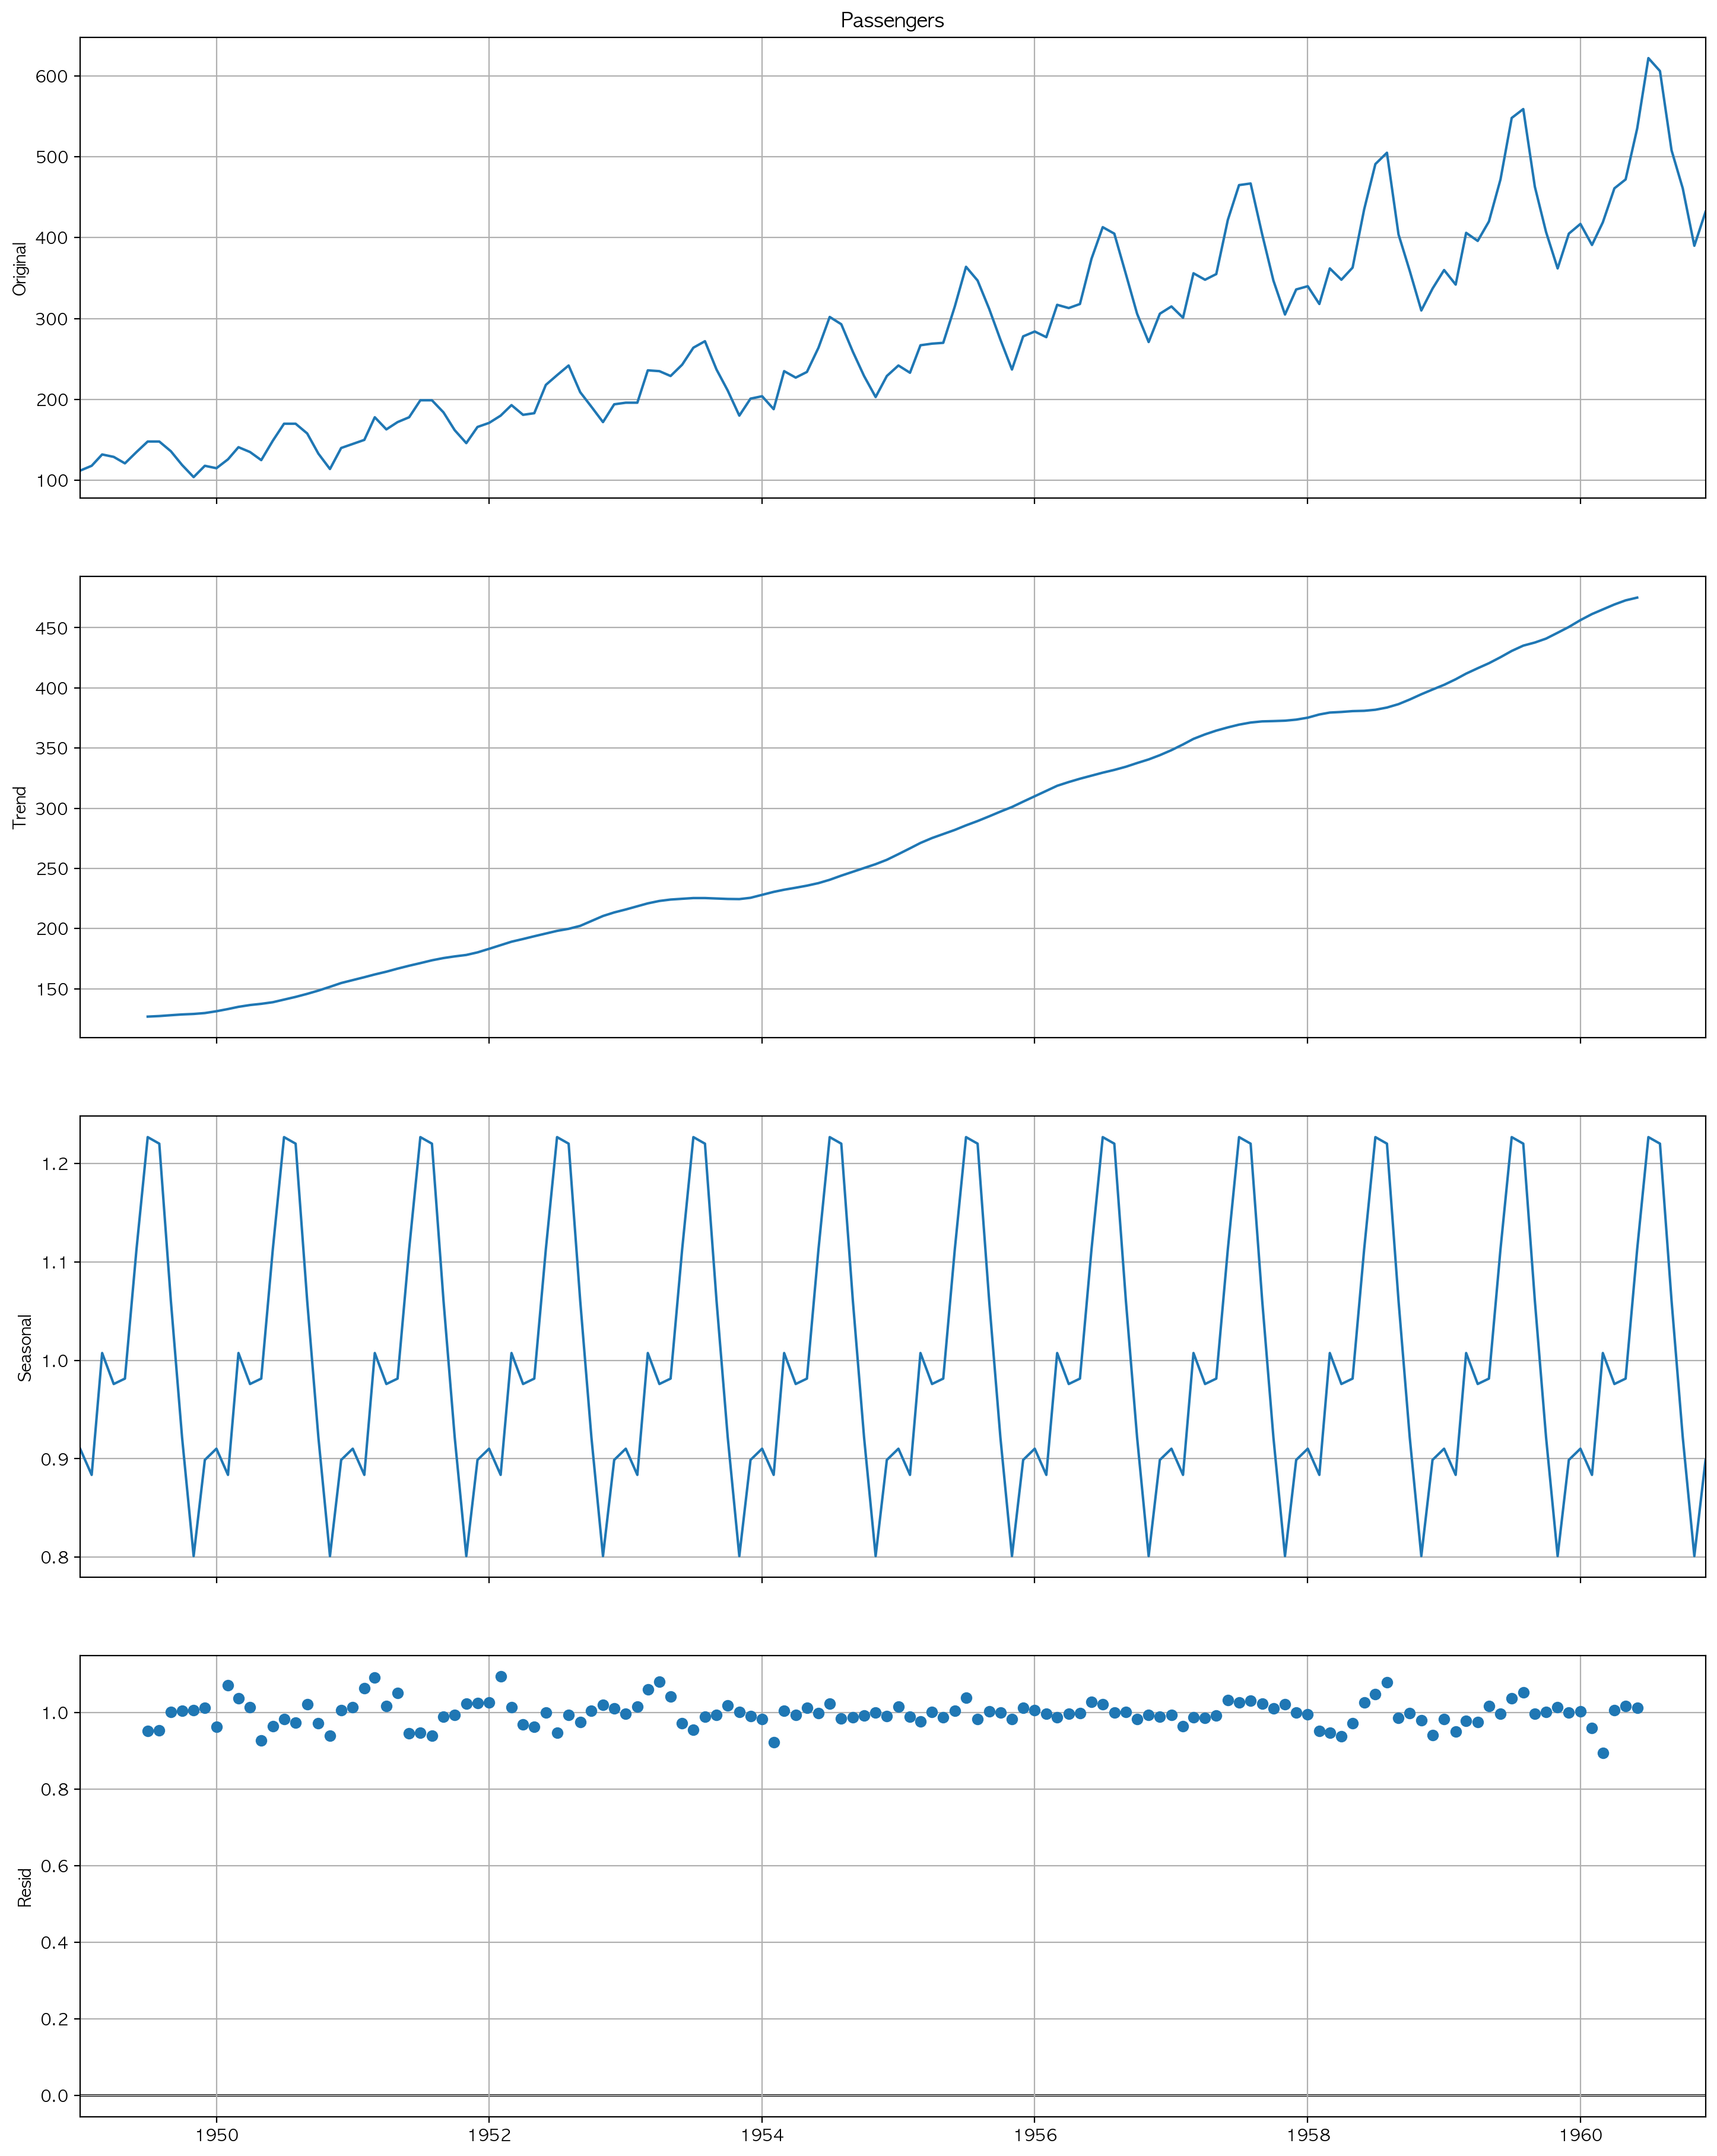

In [23]:
figure = sd.plot()
figure.set_size_inches((15, 20))

fig, ax1, ax2, ax3, ax4 = figure.get_children()

ax1.set_ylabel("Original")
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

plt.show()
plt.close()

> 원본 데이터를 분해 했을 때 전반적으로 증가하는 추세(Trend)를 보이고 있으며, 1년 단위로 데이터 패턴이 반복되고 있다(Seasonal). 전체 평균은 1을 기준으로 크게 벗어나지 않는 잔차를 보이는 것으로 보아 분석 결과가 타당해 보인다.